In [1]:
%run base.ipynb
import gym
import matplotlib.pyplot as plt

from abides_gym_market_making_environment_v1 import *
from policies_v1 import SigPolicy
from train_v1 import train
import utils

In [2]:
# register market making env for gym use 
from gym.envs.registration import register

register(
    id="market-making-v1",
    entry_point=SubGymMarketsMarketMakingEnv_v1,
)

def generate_env(seed):
    """
    generates specific environment with the parameters defined and set the seed
    """
    env = gym.make(
            "market-making-v1",
            background_config="rmsc04",
            mkt_close="11:45:00",
            timestep_duration="5s",
            order_fixed_size=10,
            first_interval="00:13:00",
            max_inventory=100,
            remaining_inventory_reward=-100,#penalty
            inventory_reward_dampener=0.6,
            damp_mode="asymmetric",
            debug_mode=False
        )

    env.seed(seed)
    
    return env

In [3]:
# create the environment
env = generate_env(5)

DeprecatedEnv: Env market-making-v0 not found (valid versions include ['market-making-v1'])

In [4]:
episodes = 1
lr = 0.01
window_length = 12
eps = 0.9
eps_decay = utils.linear_decay(epochs=2_000, start=eps, end=0.2)

sigpolicy = SigPolicy(env, 2)
sigpolicy.initialize_parameters(zero_bias=True)

results = train(env, 
                sigpolicy, 
                episodes,
                discount=0.97,
                learning_rate=lr, 
                epsilon=eps,
                epsilon_decay=eps_decay,
                window_length=window_length, 
                printing=False)

print(sigpolicy.linear.weight.data)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:01<?, ?it/s]


AssertionError: Action 10 is not contained in Action Space

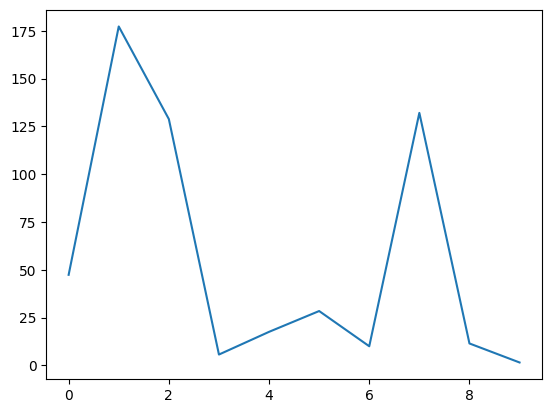

In [7]:
plt.plot(results["losses"])
#plt.plot(results["losses"])
#plt.plot([reward if reward > -2000 else 0 for reward in results["rewards"]])

hist = list(results["history"])
#plt.plot(np.array(hist)[:,3])


In [ ]:
import pickle

# write results 
with open('../results/error.pkl', 'wb') as f:  # open a text file
    pickle.dump(results, f) # serialize the list
f.close()

In [10]:
import pickle

# load results
with open('../results/500_runs.pkl', 'rb') as f:
    deserialized_results = pickle.load(f)
f.close()

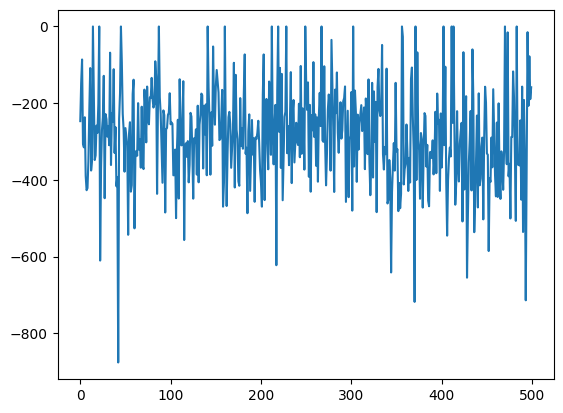

In [12]:
#plt.plot(deserialized_results["rewards"])
#plt.plot(results["losses"])
plt.plot([reward if reward > -2000 else 0 for reward in deserialized_results["rewards"]])

hist = list(deserialized_results["history"])
#plt.plot(np.array(hist)[:,3])